In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_json("C:\\Users\\Manne\\Desktop\\Data Science\\project final\\data\\schoolInfo.json")

In [4]:
df=pd.DataFrame(df)

In [5]:
df.head(5)

,rankingNoteText,nonResponderText,nonResponder,act-avg,primaryPhoto,primaryPhotoThumb,sat-avg,enrollment,city,sortName,...,displayName,schoolType,region,aliasNames,rankingType,overallRank,institutionalControl,rankingMaxPossibleScore,rankingRankStatus,primaryKey
0,NaN,None,False,32.0,https://www.usnews.com/img/college-photo_31291...,https://www.usnews.com/img/college-photo_31291...,1400.0,5400.0,Princeton,princetonuniversity,...,Princeton University,national-universities,NaN,None,national-universities,1,private,NaN,ranked,2627
1,NaN,None,False,32.0,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_...,1430.0,6710.0,Cambridge,harvarduniversity,...,Harvard University,national-universities,NaN,None,national-universities,2,private,NaN,ranked,2155
2,NaN,None,False,32.0,https://www.usnews.com/dims4/USNEWS/5b128f0/17...,https://www.usnews.com/dims4/USNEWS/196469f/17...,1450.0,5941.0,Chicago,universityofchicago,...,University of Chicago,national-universities,NaN,UChicago,national-universities,3,private,NaN,ranked,1774
3,NaN,None,False,32.0,https://www.usnews.com/dims4/USNEWS/60348dd/17...,https://www.usnews.com/dims4/USNEWS/1ca230f/17...,1420.0,5472.0,New Haven,yaleuniversity,...,Yale University,national-universities,NaN,None,national-universities,3,private,NaN,ranked,1426
4,NaN,None,False,32.0,https://www.usnews.com/img/college-photo_19002...,https://www.usnews.com/img/college-photo_19002...,1430.0,6113.0,New York,columbiauniversity,...,Columbia University,national-universities,NaN,None,national-universities,5,private,NaN,ranked,2707


In [6]:
df.shape

(311, 39)

In [7]:
print('This dataset contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

This dataset contains 311 rows and 39 columns


In [8]:
# dataframe information
df.info(max_cols = len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rankingNoteText          0 non-null      float64
 1   nonResponderText         11 non-null     object 
 2   nonResponder             311 non-null    bool   
 3   act-avg                  291 non-null    float64
 4   primaryPhoto             264 non-null    object 
 5   primaryPhotoThumb        264 non-null    object 
 6   sat-avg                  291 non-null    float64
 7   enrollment               300 non-null    float64
 8   city                     311 non-null    object 
 9   sortName                 311 non-null    object 
 10  zip                      311 non-null    int64  
 11  rankingNoteCharacter     0 non-null      float64
 12  acceptance-rate          302 non-null    float64
 13  rankingDisplayScore      230 non-null    float64
 14  percent-receiving-aid    1

In [70]:
#Check for the missing values 

df.isna().any()

rankingNoteText             True
nonResponderText            True
nonResponder               False
act-avg                     True
primaryPhoto                True
primaryPhotoThumb           True
sat-avg                     True
enrollment                  True
city                       False
sortName                   False
zip                        False
rankingNoteCharacter        True
acceptance-rate             True
rankingDisplayScore         True
percent-receiving-aid       True
cost-after-aid              True
state                      False
rankingSortRank            False
hs-gpa-avg                  True
urlName                    False
rankingDisplayName         False
rankingDisplayRank         False
ranking                    False
xwalkId                    False
rankingIsTied              False
isPublic                   False
businessRepScore            True
tuition                    False
engineeringRepScore         True
displayName                False
schoolType

In [9]:
# drop columns which have only NaN values
df.dropna(axis=1, thresh=1, inplace=True)

In [10]:
# drop columns with only one distinct value
for col in df.columns:
    if len(df[col].unique()) == 1:
        df.drop(col,inplace=True,axis=1)

In [11]:
df.head(10)

,nonResponderText,nonResponder,act-avg,primaryPhoto,primaryPhotoThumb,sat-avg,enrollment,city,sortName,zip,...,rankingIsTied,businessRepScore,tuition,engineeringRepScore,displayName,aliasNames,overallRank,institutionalControl,rankingRankStatus,primaryKey
0,None,False,32.0,https://www.usnews.com/img/college-photo_31291...,https://www.usnews.com/img/college-photo_31291...,1400.0,5400.0,Princeton,princetonuniversity,8544,...,False,NaN,47140,4.1,Princeton University,None,1,private,ranked,2627
1,None,False,32.0,https://www.usnews.com/img/college-photo_8866.jpg,https://www.usnews.com/img/college-photo_8866_...,1430.0,6710.0,Cambridge,harvarduniversity,2138,...,False,NaN,48949,3.6,Harvard University,None,2,private,ranked,2155
2,None,False,32.0,https://www.usnews.com/dims4/USNEWS/5b128f0/17...,https://www.usnews.com/dims4/USNEWS/196469f/17...,1450.0,5941.0,Chicago,universityofchicago,60637,...,True,NaN,54825,NaN,University of Chicago,UChicago,3,private,ranked,1774
3,None,False,32.0,https://www.usnews.com/dims4/USNEWS/60348dd/17...,https://www.usnews.com/dims4/USNEWS/1ca230f/17...,1420.0,5472.0,New Haven,yaleuniversity,6520,...,True,NaN,51400,3.4,Yale University,None,3,private,ranked,1426
4,None,False,32.0,https://www.usnews.com/img/college-photo_19002...,https://www.usnews.com/img/college-photo_19002...,1430.0,6113.0,New York,columbiauniversity,10027,...,True,NaN,57208,3.8,Columbia University,None,5,private,ranked,2707
5,None,False,33.0,https://www.usnews.com/img/college-photo_6935.jpg,https://www.usnews.com/img/college-photo_6935_...,1460.0,4524.0,Cambridge,massachusettsinstituteoftechnology,2139,...,True,4.6,49892,4.9,Massachusetts Institute of Technology,MIT,5,private,ranked,2178
6,None,False,31.0,https://www.usnews.com/img/college-photo_10369...,https://www.usnews.com/img/college-photo_10369...,1380.0,7034.0,Stanford,stanforduniversity,94305,...,True,NaN,49617,4.8,Stanford University,None,5,private,ranked,1305
7,None,False,32.0,https://www.usnews.com/img/college-photo_2743.jpg,https://www.usnews.com/img/college-photo_2743_...,1380.0,10019.0,Philadelphia,universityofpennsylvania,19104,...,False,4.8,53534,3.6,University of Pennsylvania,UPenn,8,private,ranked,3378
8,None,False,31.0,https://www.usnews.com/dims4/USNEWS/7e5b5e0/17...,https://www.usnews.com/dims4/USNEWS/3f12795/17...,1380.0,6609.0,Durham,dukeuniversity,27708,...,False,NaN,53744,3.7,Duke University,None,9,private,ranked,2920
9,None,False,34.0,https://www.usnews.com/img/college-photo_93.jpg,https://www.usnews.com/img/college-photo_93_17...,1510.0,979.0,Pasadena,californiainstituteoftechnology,91125,...,False,NaN,49908,4.6,California Institute of Technology,CalTech Cal Tech,10,private,ranked,1131


In [12]:
# drop non relevant columns or columns which semantically duplicate other columns in the DataFrame
df.drop(['primaryPhoto', 'primaryPhotoThumb', 'sortName', 'urlName', 'aliasNames', 'nonResponderText', 'nonResponder', 'rankingSortRank', 'overallRank', 'rankingRankStatus', 'xwalkId', 'primaryKey'], axis=1, inplace=True)

In [13]:
df.head()

,act-avg,sat-avg,enrollment,city,zip,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,state,hs-gpa-avg,rankingDisplayRank,rankingIsTied,businessRepScore,tuition,engineeringRepScore,displayName,institutionalControl
0,32.0,1400.0,5400.0,Princeton,8544,7.0,100.0,60.0,16793.0,NJ,3.9,#1,False,NaN,47140,4.1,Princeton University,private
1,32.0,1430.0,6710.0,Cambridge,2138,5.0,98.0,55.0,16338.0,MA,4.0,#2,False,NaN,48949,3.6,Harvard University,private
2,32.0,1450.0,5941.0,Chicago,60637,8.0,96.0,42.0,27767.0,IL,4.0,#3,True,NaN,54825,NaN,University of Chicago,private
3,32.0,1420.0,5472.0,New Haven,6520,6.0,96.0,50.0,18385.0,CT,NaN,#3,True,NaN,51400,3.4,Yale University,private
4,32.0,1430.0,6113.0,New York,10027,6.0,95.0,48.0,21041.0,NY,NaN,#5,True,NaN,57208,3.8,Columbia University,private


In [14]:
# number of unique cities
df['city'].nunique()

240

In [15]:
# dataframe information
df.info(max_cols = len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   act-avg                291 non-null    float64
 1   sat-avg                291 non-null    float64
 2   enrollment             300 non-null    float64
 3   city                   311 non-null    object 
 4   zip                    311 non-null    int64  
 5   acceptance-rate        302 non-null    float64
 6   rankingDisplayScore    230 non-null    float64
 7   percent-receiving-aid  143 non-null    float64
 8   cost-after-aid         143 non-null    float64
 9   state                  311 non-null    object 
 10  hs-gpa-avg             244 non-null    float64
 11  rankingDisplayRank     311 non-null    object 
 12  rankingIsTied          311 non-null    bool   
 13  businessRepScore       234 non-null    float64
 14  tuition                311 non-null    int64  
 15  engine

In [16]:
df['city'].value_counts().head(10)

Chicago       6
New York      6
Washington    5
San Diego     4
Rochester     4
Atlanta       4
Boston        4
Nashville     4
Milwaukee     3
Pittsburgh    3
Name: city, dtype: int64

In [17]:
df['state'].value_counts().head(10)

CA    27
TX    24
NY    21
MA    16
OH    14
IL    13
PA    13
FL    12
GA    11
TN    10
Name: state, dtype: int64

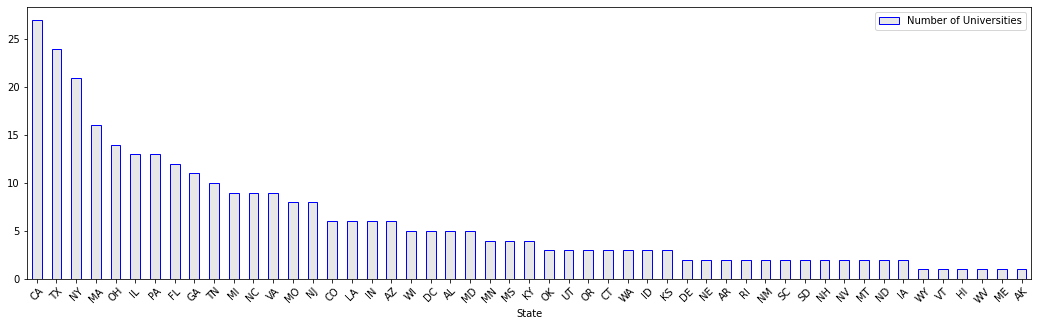

In [19]:
# create a new dataframe with the number of universities in each state and plot the graph
df_count = df['state'].value_counts().rename_axis('State').reset_index(name='Number of Universities')

df_count_to_plot = df_count

df_count_to_plot["State"] = df_count["State"]
df_count_to_plot["Number of Universities"] = df_count["Number of Universities"]

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (18, 5)
df_count_to_plot.plot.bar(x='State', rot=45, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')


In [20]:
# move the column with university names to the front so the table gets more readable
df = df[ ['displayName'] + [ col for col in df.columns if col != 'displayName' ] ]

In [21]:
df.head(10)

,displayName,act-avg,sat-avg,enrollment,city,zip,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,state,hs-gpa-avg,rankingDisplayRank,rankingIsTied,businessRepScore,tuition,engineeringRepScore,institutionalControl
0,Princeton University,32.0,1400.0,5400.0,Princeton,8544,7.0,100.0,60.0,16793.0,NJ,3.9,#1,False,NaN,47140,4.1,private
1,Harvard University,32.0,1430.0,6710.0,Cambridge,2138,5.0,98.0,55.0,16338.0,MA,4.0,#2,False,NaN,48949,3.6,private
2,University of Chicago,32.0,1450.0,5941.0,Chicago,60637,8.0,96.0,42.0,27767.0,IL,4.0,#3,True,NaN,54825,NaN,private
3,Yale University,32.0,1420.0,5472.0,New Haven,6520,6.0,96.0,50.0,18385.0,CT,NaN,#3,True,NaN,51400,3.4,private
4,Columbia University,32.0,1430.0,6113.0,New York,10027,6.0,95.0,48.0,21041.0,NY,NaN,#5,True,NaN,57208,3.8,private
5,Massachusetts Institute of Technology,33.0,1460.0,4524.0,Cambridge,2139,8.0,95.0,58.0,20331.0,MA,NaN,#5,True,4.6,49892,4.9,private
6,Stanford University,31.0,1380.0,7034.0,Stanford,94305,5.0,95.0,47.0,19296.0,CA,NaN,#5,True,NaN,49617,4.8,private
7,University of Pennsylvania,32.0,1380.0,10019.0,Philadelphia,19104,9.0,93.0,47.0,25441.0,PA,3.9,#8,False,4.8,53534,3.6,private
8,Duke University,31.0,1380.0,6609.0,Durham,27708,11.0,92.0,41.0,23374.0,NC,NaN,#9,False,NaN,53744,3.7,private
9,California Institute of Technology,34.0,1510.0,979.0,Pasadena,91125,8.0,91.0,51.0,23973.0,CA,NaN,#10,False,NaN,49908,4.6,private


In [22]:
df1= pd.read_csv("C:\\Users\\Manne\\Desktop\\Data Science\\project final\\data\\uscities.csv")

In [23]:
df1.columns

Index(['city', 'city_ascii', 'state_id', 'state_name', 'county_fips',
       'county_name', 'lat', 'lng', 'population', 'density', 'source',
       'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'],
      dtype='object')

In [24]:
# we see that in the 'city_ascii' column cities have the more universal spelling
df1.loc[(df1['city'] != df1['city_ascii'])]

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
272,Bayamón,Bayamon,PR,Puerto Rico,72021,Bayamón,18.3793,-66.1635,161034,2304,polygon,False,False,America/Puerto_Rico,2,00959 00957 00956 00934 00960 00961 00966 00916,1630035622
805,Mayagüez,Mayaguez,PR,Puerto Rico,72097,Mayagüez,18.2003,-67.1397,61361,1129,polygon,False,False,America/Puerto_Rico,3,00682 00680 00681,1630035520
1731,Cañon City,Canon City,CO,Colorado,8043,Fremont,38.4430,-105.2203,27676,521,polygon,False,True,America/Denver,3,81212 81215,1840018855
1855,Española,Espanola,NM,New Mexico,35039,Rio Arriba,36.0041,-106.0669,25952,497,polygon,False,True,America/Denver,3,87567 87532 87533,1840020348
2000,Cataño,Catano,PR,Puerto Rico,72033,Cataño,18.4415,-66.1388,24271,1921,polygon,False,False,America/Puerto_Rico,3,00962 00965 00963,1630023554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23769,Cañon,Canon,NM,New Mexico,35043,Sandoval,35.6718,-106.7527,198,4,polygon,False,False,America/Denver,3,87024,1840024903
23987,Lopeño,Lopeno,TX,Texas,48505,Zapata,26.7120,-99.1008,188,88,polygon,False,False,America/Chicago,3,78564,1840018300
24319,Salineño,Salineno,TX,Texas,48427,Starr,26.5176,-99.1121,174,987,polygon,False,False,America/Chicago,3,78585,1840019724
26420,Cañones,Canones,NM,New Mexico,35039,Rio Arriba,36.1769,-106.4244,92,8,polygon,False,False,America/Denver,3,87516,1840024822


In [25]:
df1.drop(['city'], axis=1, inplace=True)

In [26]:
df1.rename(columns={"city_ascii": "city"}, inplace=True)

In [27]:
# merge two tables on city names, we want citites from the 'university-statistics' table
# to have longitude and latitude data which we extract from the US Cities Database table
df_merged = pd.merge(df, df1, on='city')


In [28]:
df_merged

,displayName,act-avg,sat-avg,enrollment,city,zip,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,...,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,Princeton University,32.0,1400.0,5400.0,Princeton,8544,7.0,100.0,60.0,16793.0,...,-80.3971,32299,1680,polygon,False,False,America/New_York,3,33032 33092,1840014248
1,Princeton University,32.0,1400.0,5400.0,Princeton,8544,7.0,100.0,60.0,16793.0,...,-74.6693,31187,670,polygon,False,True,America/New_York,3,08540 08542 08541 08544,1840001381
2,Princeton University,32.0,1400.0,5400.0,Princeton,8544,7.0,100.0,60.0,16793.0,...,-96.5044,13894,531,polygon,False,True,America/Chicago,3,75407,1840020663
3,Princeton University,32.0,1400.0,5400.0,Princeton,8544,7.0,100.0,60.0,16793.0,...,-87.5784,8733,665,polygon,False,True,America/Chicago,3,47670,1840009801
4,Princeton University,32.0,1400.0,5400.0,Princeton,8544,7.0,100.0,60.0,16793.0,...,-89.4640,7840,348,polygon,False,True,America/Chicago,3,61356,1840009276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Wilmington University,NaN,NaN,8873.0,New Castle,19720,100.0,NaN,NaN,NaN,...,-85.3697,21555,898,polygon,False,True,America/Indiana/Indianapolis,3,47362,1840008396
1596,Wilmington University,NaN,NaN,8873.0,New Castle,19720,100.0,NaN,NaN,NaN,...,-107.5267,6275,798,polygon,False,True,America/Denver,3,81647,1840022429
1597,Wilmington University,NaN,NaN,8873.0,New Castle,19720,100.0,NaN,NaN,NaN,...,-75.5692,5392,617,polygon,False,True,America/New_York,3,19720 19721,1840005577
1598,Wilmington University,NaN,NaN,8873.0,New Castle,19720,100.0,NaN,NaN,NaN,...,-85.1689,939,884,polygon,False,True,America/New_York,3,40058 40050,1840014281


In [29]:
df_merged = df_merged.loc[(df_merged['state'] == df_merged['state_id'])]

In [91]:
df_merged

,displayName,act-avg,sat-avg,enrollment,city,zip,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,...,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
1,Princeton University,32.0,1400.0,5400.0,Princeton,8544,7.0,100.0,60.0,16793.0,...,-74.6693,31187,670,polygon,False,True,America/New_York,3,08540 08542 08541 08544,1840001381
16,Harvard University,32.0,1430.0,6710.0,Cambridge,2138,5.0,98.0,55.0,16338.0,...,-71.1185,118927,7182,polygon,False,True,America/New_York,2,02142 02140 02141 02139 02138 02238 02477,1840000429
27,Massachusetts Institute of Technology,33.0,1460.0,4524.0,Cambridge,2139,8.0,95.0,58.0,20331.0,...,-71.1185,118927,7182,polygon,False,True,America/New_York,2,02142 02140 02141 02139 02138 02238 02477,1840000429
38,Lesley University,21.0,960.0,1929.0,Cambridge,2138,64.0,34.0,NaN,NaN,...,-71.1185,118927,7182,polygon,False,True,America/New_York,2,02142 02140 02141 02139 02138 02238 02477,1840000429
49,University of Chicago,32.0,1450.0,5941.0,Chicago,60637,8.0,96.0,42.0,27767.0,...,-87.6862,8604203,4574,polygon,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,Wichita State University,21.0,915.0,11823.0,Wichita,67260,92.0,NaN,NaN,NaN,...,-97.3442,482249,931,polygon,False,True,America/Chicago,2,67230 67235 67260 67217 67216 67215 67214 6721...,1840001686
1587,Argosy University,NaN,NaN,NaN,Orange,92868,NaN,NaN,NaN,NaN,...,-117.8218,138669,2086,polygon,False,True,America/Los_Angeles,2,92868 92869 92866 92867 92865 92856 92857 9286...,1840020582
1591,Idaho State University,NaN,NaN,NaN,Pocatello,83209,NaN,NaN,NaN,NaN,...,-112.4646,72878,657,polygon,False,True,America/Boise,3,83204 83201 83209 83205 83206,1840013376
1592,Trident University International,NaN,NaN,NaN,Cypress,90630,96.0,NaN,NaN,NaN,...,-118.0386,49006,2861,polygon,False,True,America/Los_Angeles,2,90630,1840019327


In [30]:
df2=pd.read_csv("C:\\Users\\Manne\\Desktop\\Data Science\\project final\\data\\us_companies.csv")

In [31]:
df2

,company_name_id,company_name,url,year_founded,city,state,country,zip_code,full_time_employees,company_type,...,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
0,3-round-stones-inc,"3 Round Stones, Inc.",http://3RoundStones.com,2010.0,Washington,DC,us,20004.0,1-10,Private,...,"Business to Business, Business to Consumer",NaN,3 Round Stones produces a platform for publish...,Our Open Source platform is used by the Fortun...,NaN,NaN,NaN,[],"3 Round Stones is a profitable, self-funded, w...",2014-11-12 14:44:25.969871
1,48-factoring-inc,48 Factoring Inc.,https://www.48factoring.com,2014.0,Philadelphia,PA,us,19087.0,51-200,Private,...,Business to Business,Small Business Owners,The company mission is to provide finance to s...,48 Factoring Inc. is one of the best financial...,11-50,Business,NaN,"[u'Cost efficiency', u'Job growth', u'Revenue ...",NaN,2015-05-18 11:36:39.902880
2,5psolutions,5PSolutions,www.5psolutions.com,2007.0,Fairfax,VA,us,22003.0,1-10,Private,...,"Business to Business, Business to Consumer, Bu...",NaN,"At 5PSolutions, we wish to make all basic info...",5PSolutions are artisans of mobile platforms.,NaN,NaN,NaN,[],NaN,2014-11-12 15:09:35.485949
3,abt-associates,Abt Associates,abtassoc.com,1965.0,Cambridge,MA,us,2138.0,"1,001-5,000",Private,...,NaN,NaN,"Abt Associates is a mission-driven, internatio...","Abt Associates is a mission-driven, global lea...",101+,NaN,NaN,[],Employee-owned company. $552M/year.,2014-09-11 17:23:21.390289
4,accela,Accela,http://www.accela.com,1999.0,San Ramon,CA,us,94583.0,"501-1,000",Private,...,Business to Consumer,"Citizen engagement and participation, Good gov...",Accela powers thousands of services and millio...,Accela improves citizen engagement by making i...,101+,"Health/Healthcare, Housing, Public Safety",NaN,[],NaN,2014-09-16 16:30:49.172802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,zillow,Zillow,http://www.zillow.com/,2006.0,Seattle,WA,us,98101.0,"1,001-5,000",Public,...,NaN,NaN,Zillow is a home and real estate marketplace d...,Zillow is an online real estate database.,NaN,NaN,NaN,[],NaN,2014-08-21 15:25:48.411679
525,zocdoc,ZocDoc,http://www.zocdoc.com/,2007.0,New York,NY,us,10012.0,"501-1,000",Private,...,NaN,NaN,ZocDoc is a service to help people find and ma...,Patients use ZocDoc to book appointments with ...,NaN,NaN,NaN,[],NaN,2014-04-03 20:10:00.163762
526,zonability,Zonability,http://www.zonability.com/,2003.0,Austin,TX,us,78702.0,11-50,Private,...,"Business to Business, Business to Government, ...",NaN,Zonability is a web application that provides ...,Zonability is a web application that provides ...,NaN,NaN,NaN,[],NaN,2014-11-20 12:45:39.832982
527,zoner,Zoner,www.Zonerapp.com,2011.0,New York,NY,us,10018.0,1-10,Private,...,"Business to Business, Business to Consumer, no...",NaN,<p>Zoner is a Digital Zoning Optimization soft...,Zoner leverages transparency over fear so a pr...,1-10,NaN,NaN,[],NaN,2014-11-12 18:11:48.966303


In [32]:
# merge two tables on city names, we want citites from the 'university-statistics' table
# to have longitude and latitude data which we extract from the US Cities Database table
df_merged1 = pd.merge(df_merged, df2, on='city')

In [33]:
df_merged1

,displayName,act-avg,sat-avg,enrollment,city,zip,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,...,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
0,Harvard University,32.0,1430.0,6710.0,Cambridge,2138,5.0,98.0,55.0,16338.0,...,NaN,NaN,"Abt Associates is a mission-driven, internatio...","Abt Associates is a mission-driven, global lea...",101+,NaN,NaN,[],Employee-owned company. $552M/year.,2014-09-11 17:23:21.390289
1,Harvard University,32.0,1430.0,6710.0,Cambridge,2138,5.0,98.0,55.0,16338.0,...,"Business to Consumer, Business to Government",NaN,BetterLesson is focused on aggregating and sca...,BetterLesson was founded by a group of public ...,NaN,Education,NaN,[],NaN,2014-11-12 17:10:00.302936
2,Harvard University,32.0,1430.0,6710.0,Cambridge,2138,5.0,98.0,55.0,16338.0,...,Business to Business,NaN,Forrester Research is an independent global te...,Forrester is a research and advisory firm serv...,101+,NaN,NaN,[],NaN,2014-10-09 14:37:50.127093
3,Harvard University,32.0,1430.0,6710.0,Cambridge,2138,5.0,98.0,55.0,16338.0,...,"Business to Business, academia",NaN,"At GenoSpace, we are Digital Architects of Gen...",GenoSpace has developed software systems for s...,NaN,Health/Healthcare,NaN,[],NaN,2014-11-12 16:35:11.283317
4,Harvard University,32.0,1430.0,6710.0,Cambridge,2138,5.0,98.0,55.0,16338.0,...,Business to Consumer,NaN,Glassy Media is a digital production company t...,Glassy Media is a production company hatched o...,NaN,Government Operations,NaN,[],NaN,2014-10-09 15:28:44.810371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,University of Arkansas--Little Rock,19.0,930.0,9374.0,Little Rock,72204,77.0,NaN,NaN,NaN,...,Business to Business,NaN,"Acxiom is an enterprise data, analytics and so...","Acxiom is an enterprise data, analytics and so...",101+,NaN,NaN,[],NaN,2014-09-18 16:53:16.538684
1127,University of Nebraska--Omaha,19.0,930.0,12536.0,Omaha,68182,86.0,NaN,NaN,NaN,...,NaN,NaN,Berkshire Hathaway Inc. is a holding company o...,Berkshire Hathaway Inc. is a multinational con...,101+,"Education, Finance",NaN,[],NaN,2014-09-23 15:41:26.481363
1128,University of Texas--Arlington,20.0,950.0,32775.0,Arlington,76019,70.0,NaN,NaN,NaN,...,Business to Government,NaN,Apextech LLC's mission is to provide clients w...,"Apextech LLC, a commercial and government cons...",NaN,NaN,NaN,[],We have developed solutions in the internation...,2014-11-12 14:24:01.183467
1129,University of Texas--Arlington,20.0,950.0,32775.0,Arlington,76019,70.0,NaN,NaN,NaN,...,"Business to Business, Business to Government",NaN,<p>GovTribe believes in the power of open gove...,GovTribe makes products to help people who are...,11-50,NaN,NaN,[],GovTribe was bootstrapped by its founders unt...,2014-11-12 15:09:09.025996


In [34]:
df_merged1.columns

Index(['displayName', 'act-avg', 'sat-avg', 'enrollment', 'city', 'zip',
       'acceptance-rate', 'rankingDisplayScore', 'percent-receiving-aid',
       'cost-after-aid', 'state_x', 'hs-gpa-avg', 'rankingDisplayRank',
       'rankingIsTied', 'businessRepScore', 'tuition', 'engineeringRepScore',
       'institutionalControl', 'state_id', 'state_name', 'county_fips',
       'county_name', 'lat', 'lng', 'population', 'density', 'source',
       'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id',
       'company_name_id', 'company_name', 'url', 'year_founded', 'state_y',
       'country', 'zip_code', 'full_time_employees', 'company_type',
       'company_category', 'revenue_source', 'business_model', 'social_impact',
       'description', 'description_short', 'source_count', 'data_types',
       'example_uses', 'data_impacts', 'financial_info', 'last_updated'],
      dtype='object')

In [35]:
# drop non relevant columns or columns which semantically duplicate other columns in the DataFrame
df_merged1.drop(['url', 'year_founded','description', 'description_short', 'source_count', 'data_types',
       'example_uses', 'data_impacts','zip_code','last_updated'''], axis=1, inplace=True)       

In [36]:
df_merged1.columns

Index(['displayName', 'act-avg', 'sat-avg', 'enrollment', 'city', 'zip',
       'acceptance-rate', 'rankingDisplayScore', 'percent-receiving-aid',
       'cost-after-aid', 'state_x', 'hs-gpa-avg', 'rankingDisplayRank',
       'rankingIsTied', 'businessRepScore', 'tuition', 'engineeringRepScore',
       'institutionalControl', 'state_id', 'state_name', 'county_fips',
       'county_name', 'lat', 'lng', 'population', 'density', 'source',
       'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id',
       'company_name_id', 'company_name', 'state_y', 'country',
       'full_time_employees', 'company_type', 'company_category',
       'revenue_source', 'business_model', 'social_impact', 'financial_info'],
      dtype='object')

In [37]:
df_merged1['state_y'].value_counts()

NY    499
CA    155
MA    111
IL    104
DC     85
WA     30
GA     25
TX     19
MD     17
PA     12
CO     12
MO      8
WI      7
OH      7
FL      6
MN      4
IN      4
NC      4
MI      3
VA      3
AZ      3
CT      3
KY      2
TN      1
OR      1
OK      1
AR      1
ME      1
MT      1
NE      1
IA      1
Name: state_y, dtype: int64

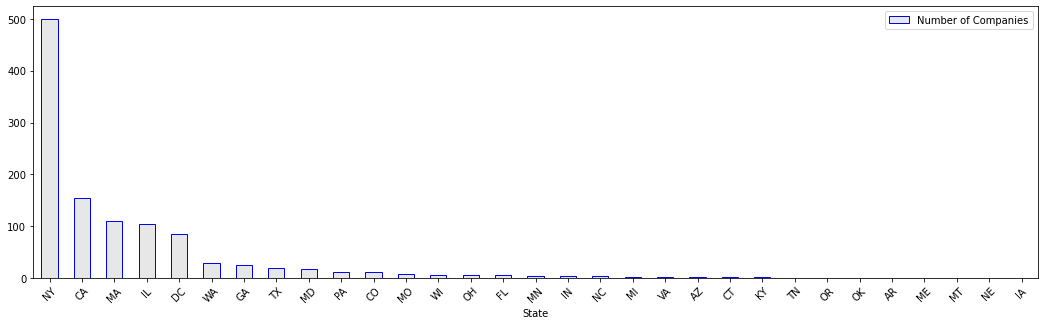

In [39]:
# create a new dataframe with the number of companies in each state and plot the graph

df_count1 = df_merged1['state_y'].value_counts().rename_axis('State').reset_index(name='Number of Companies')

df_count_to_plot = df_count1

df_count_to_plot["State"] = df_count1["State"]
df_count_to_plot["Number of Companies"] = df_count1["Number of Companies"]

import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (18, 5)
df_count_to_plot.plot.bar(x='State', rot=45, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')

Here, we can observe that the states such as NY,CA,MA,IL,DC has good number of companies present there. So, the chance of students joining in the universities near these area's are high.


In [117]:
import geopandas as gpd
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [118]:
# Create a map
m_1 = folium.Map(location=[42.32,-81.0589], tiles='openstreetmap', zoom_start=3)

# Add points to the map
for idx, row in df_merged.iterrows():
    Marker([row['lat'], row['lng']]).add_to(m_1)

# Display the map
m_1

In [119]:
# a new DataFrame with the top univiersities by ranking
df_top = df_merged.loc[df_merged['rankingDisplayScore'] >90]

In [120]:
# show a map with the top universities by ranking
m_2 = folium.Map(location=[42.32,-81.0589], tiles='openstreetmap', zoom_start=3)

for idx, row in df_top.iterrows():
    Marker([row['lat'], row['lng']]).add_to(m_2)

m_2

We see that the most top universities are located on the East Coast, two are in California and one in Chicago.

## Relationship between ranking and acceptance rate

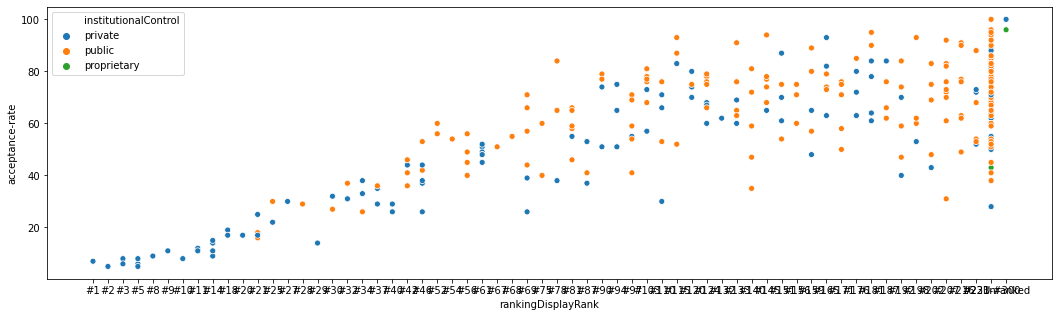

In [42]:
sns.scatterplot(data=df, x="rankingDisplayRank", y="acceptance-rate", hue="institutionalControl")

From the graph, we can say that the top ranked university are private university with low acceptance rate. Going on from left to right we can say that the acceptance rate is being increased for both private and public universities.

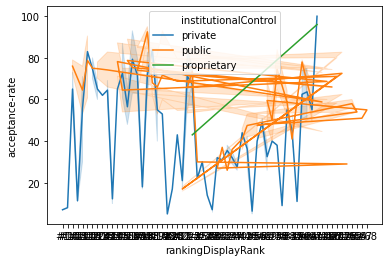

In [28]:
sns.lineplot(x="rankingDisplayRank", y="acceptance-rate",
             hue="institutionalControl", 
             data=df)

same relation but with line plot graph, we are getting the same outcome.

##  Relationship between Ranking and Tuition Fee

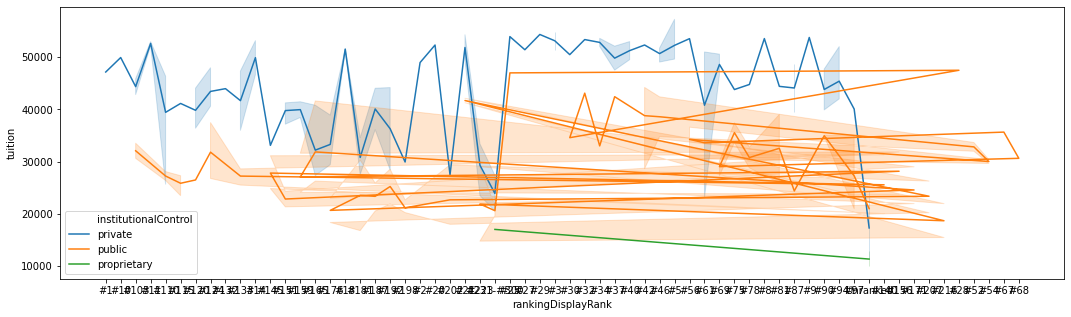

In [43]:
sns.lineplot(x="rankingDisplayRank", y='tuition',
             hue="institutionalControl", 
             data=df)

From the graph, we are obtaining the information about the private universities has more tuition fee when compared to pubic universities irrespective of ranking of the university.

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

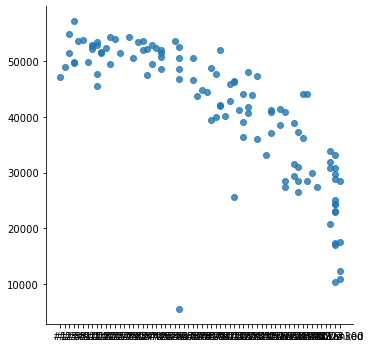

In [29]:
sns.lmplot(y='tuition', x='rankingDisplayRank', hue="institutionalControl", data=df)

same relation but with scatter plot graph, we are getting the same outcome.

## Relationship between Aid and Tuition Fee

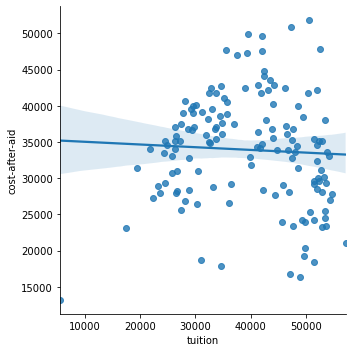

In [30]:
sns.lmplot(x='tuition', y='cost-after-aid', data=df)

From the scatterplot, we can conclude that universities with higher tuition fee does not affect the financial aid.

## Relationship between Ranking and Enrollment

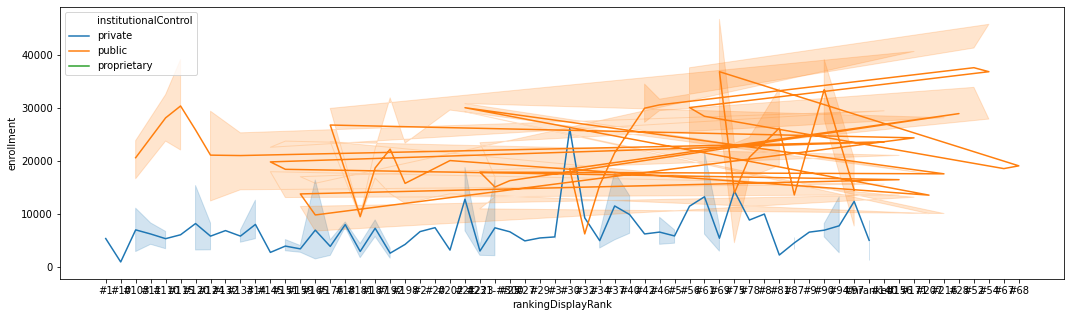

In [44]:
sns.lineplot(x="rankingDisplayRank", y="enrollment",
             hue="institutionalControl", 
             data=df)

We can observe from the graph that public universities have high enrollement irrespective of ranking, whereas the private universities have lesser enrollment. 

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

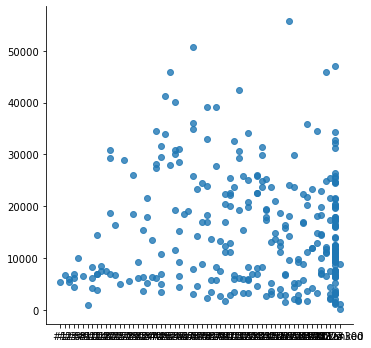

In [33]:
sns.lmplot(x="rankingDisplayRank", y="enrollment",
             data=df)

same relation but with scatter plot graph, we are getting the same outcome.

## Relationship between Ranking and Population

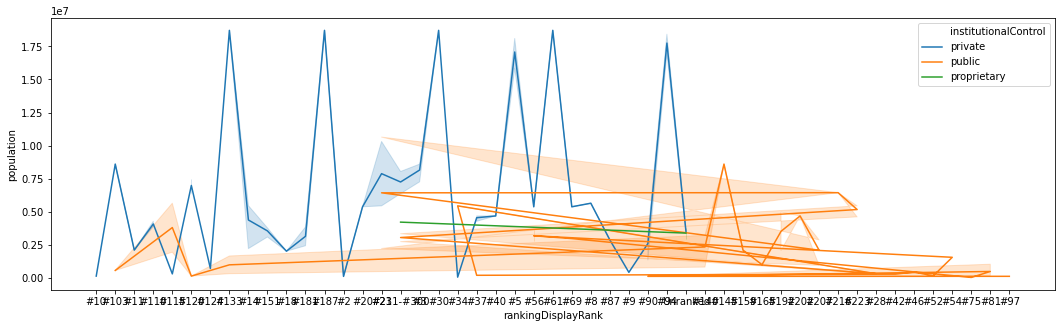

In [45]:
sns.lineplot(x="rankingDisplayRank", y="population",
             hue="institutionalControl", 
             data=df_merged1)

It is evident that the area's with high population has high ranked universities i.e., mostly private universities. And the public universities area's  having population lower than the private univerisity area's. 

## Relationship between the independent attributes

In [34]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,act-avg,sat-avg,enrollment,zip,acceptance-rate,rankingDisplayScore,percent-receiving-aid,cost-after-aid,hs-gpa-avg,rankingIsTied,businessRepScore,tuition,engineeringRepScore
act-avg,1.000000,0.975125,-0.034328,-0.258934,-0.744434,0.920344,0.204851,-0.375214,0.762587,0.369733,0.752534,0.772908,0.697582
sat-avg,0.975125,1.000000,-0.029778,-0.231023,-0.774022,0.919564,0.194296,-0.408720,0.737031,0.335454,0.756494,0.750326,0.712646
enrollment,-0.034328,-0.029778,1.000000,0.207471,0.083573,-0.054141,-0.643573,0.232098,0.279198,0.107936,0.366980,-0.251805,0.123986
zip,-0.258934,-0.231023,0.207471,1.000000,0.203611,-0.150935,-0.365460,0.269866,-0.097660,-0.100536,-0.047939,-0.246987,-0.027129
acceptance-rate,-0.744434,-0.774022,0.083573,0.203611,1.000000,-0.812346,-0.149612,0.368985,-0.488133,-0.151404,-0.585649,-0.627316,-0.606034
rankingDisplayScore,0.920344,0.919564,-0.054141,-0.150935,-0.812346,1.000000,0.120072,-0.418525,0.659202,-0.358008,0.812024,0.728050,0.742568
percent-receiving-aid,0.204851,0.194296,-0.643573,-0.365460,-0.149612,0.120072,1.000000,-0.419085,-0.182186,-0.087342,-0.338303,0.406168,-0.072960
cost-after-aid,-0.375214,-0.408720,0.232098,0.269866,0.368985,-0.418525,-0.419085,1.000000,-0.093653,0.256549,-0.074852,-0.051745,-0.157731
hs-gpa-avg,0.762587,0.737031,0.279198,-0.097660,-0.488133,0.659202,-0.182186,-0.093653,1.000000,0.432078,0.560696,0.517456,0.570413
rankingIsTied,0.369733,0.335454,0.107936,-0.100536,-0.151404,-0.358008,-0.087342,0.256549,0.432078,1.000000,0.342318,0.402589,0.153580


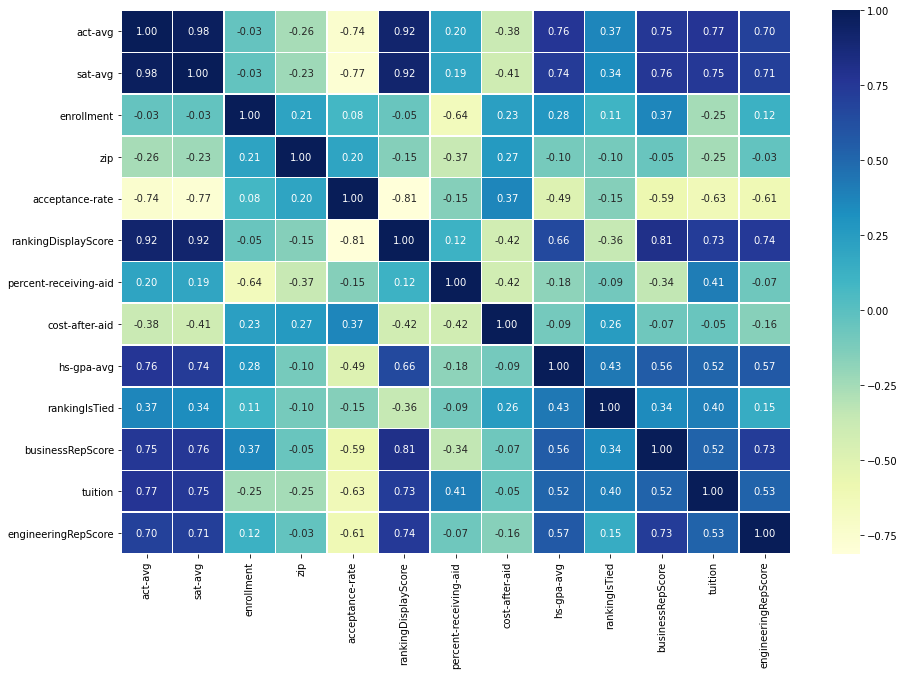

In [35]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

Much better. A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease) in terms of ranking